In [134]:
import scipy.integrate as integrate
import numpy as np

In [135]:
import matplotlib.pyplot as plt

In [136]:
class Fourie_series():
    
    _T_step_default = 100

    def __init__(self, x_t_func, T, w = None) -> None:
        self.X_t_func = x_t_func
        self.t_0 = 0 # ? 
        self.T = T # ?
        self.w = 2 * np.pi / self.T if w is None else w # ?

    def _calc_a_n(self, n):
        """
            Counts the values of a_n
            Calculates the integral using the scipy library. By QUADPACK method
        """
        twice_T = 2 / self.T

        under_integral_func = lambda t: self.X_t_func(t) * np.cos(n * self.w * t)

        integral = integrate.quad(under_integral_func, self.t_0, self.t_0 + self.T)[0]
        return twice_T * integral

    def _calc_b_n(self, n):
        """
            Counts the values of b_n
            Calculates the integral using the scipy library. By QUADPACK method
        """
        twice_T = 2 / self.T

        under_integral_func = lambda t: self.X_t_func(t) * np.sin(n * self.w * t)

        integral = integrate.quad(under_integral_func, self.t_0, self.t_0 + self.T)[0]
        return twice_T * integral
    
    def _calc_c_n(self, n):
        """
            Counts the values of c_n
            Calculates the integral using the scipy library. By QUADPACK method
        """
        freq = 1 / self.T

        under_integral_func = lambda t: self.X_t_func(t) * np.exp(-1j * n * self.w * t)

        integral = integrate.quad(under_integral_func, -self.T/2, self.T/2)[0]

        return freq * integral
    
    def _calc_fourie_series_legacy(self, t, N):
        a_0 = self._calc_a_n(0)

        twice_a_0 = a_0 / 2

        a_n_series = np.array([self._calc_a_n(n) * np.cos(n * self.w * t) for n in range(1, N)])
        b_n_series = np.array([self._calc_b_n(n) * np.sin(n * self.w * t) for n in range(1, N)])

        fourie_sum = a_n_series.sum() + b_n_series.sum()

        return twice_a_0 + fourie_sum
    
    def _calc_fourie_series(self, t, N):

        c_n_series = np.array([self._calc_c_n(n) * np.exp(1j * n * self.w * t) for n in range(-N, N)])

        return c_n_series.sum()
        
    def _calc_fouries_series_by_time(self, N, t_start = 0, t_end = None, t_step = None, use_legacy = False):
        if t_step is None and t_end is None and t_start < 2:
            t_end = 2
        if t_step is None:
            t_step = t_end / self._T_step_default

        time_series = np.arange(t_start, t_end, t_step)

        if use_legacy:
            fourie_series = np.array([self._calc_fourie_series_legacy(t, N) for t in time_series])
        else:
            fourie_series = np.array([self._calc_fourie_series(t, N) for t in time_series])

        return (fourie_series, time_series)

    def __call__(self, N, t_start = 0, t_end = None, t_step = None, use_legacy = False):
        return self._calc_fouries_series_by_time(N, t_start, t_end, t_step, use_legacy)


In [137]:
def rec_imp(t):
    t_r = np.floor(t)
    if t_r % 2 == 0:
        return 2
    else:
        return 0

rec_ser = Fourie_series(rec_imp, 2)
rec_series = rec_ser(10, t_end=1.52, t_start=-1.5, t_step=0.01, use_legacy = True)


In [138]:
origin_signal = np.array([rec_imp(t) for t in rec_series[1]])

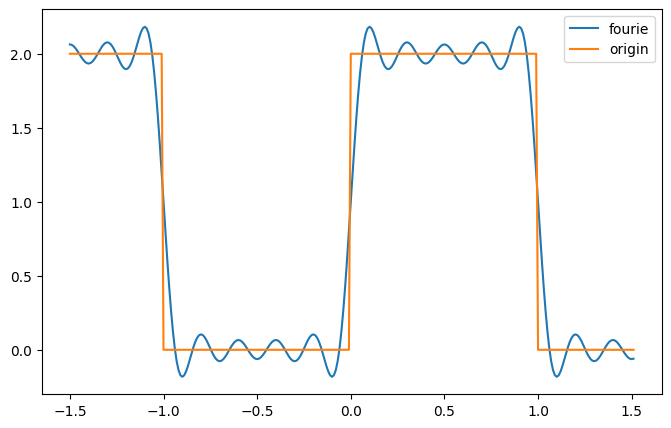

In [139]:
fig = plt.figure(figsize=(8, 5))
# print(rec_series)
plt.plot(rec_series[1], rec_series[0], label='fourie')
plt.plot(rec_series[1], origin_signal, label='origin')
plt.legend()
plt.show()

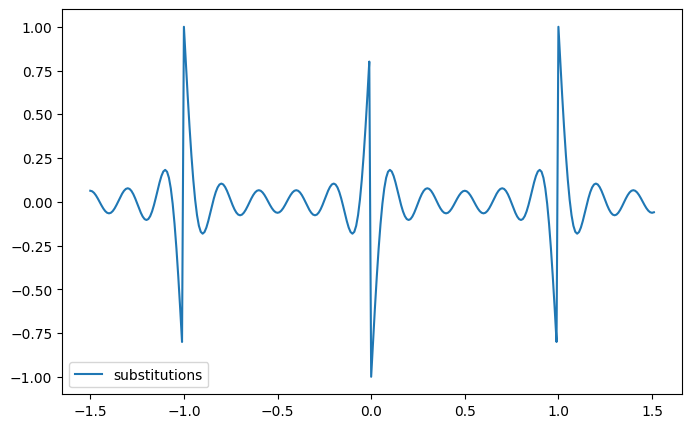

In [140]:
fig = plt.figure(figsize=(8, 5))
subs = rec_series[0] - origin_signal

plt.plot(rec_series[1], subs, label='substitutions')
plt.legend()
plt.show()

In [141]:
def cosinus_signal(w, A):
    return lambda t: np.cos(t * w) * A

w = 100 * 2 * 3.14

original_signal_func = cosinus_signal(w, 5)

cos_ser = Fourie_series(original_signal_func, T=1/100, w = w)
cos_series = cos_ser(10, t_end=0.3, t_start=0, t_step=0.001)

origin_signal_cos = np.array([original_signal_func(t) for t in cos_series[1]])

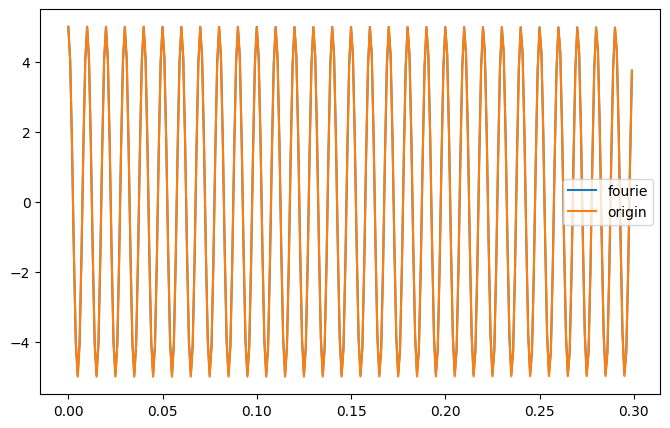

In [142]:
fig = plt.figure(figsize=(8, 5))
# print(cos_series[1])
plt.plot(cos_series[1], cos_series[0], label='fourie')
plt.plot(cos_series[1], origin_signal_cos, label='origin')
plt.legend()
plt.show()

[0.         0.00138889 0.00277778 0.00416667 0.00555556 0.00694444
 0.00833333 0.00972222 0.01111111 0.0125    ]
[ 1.00000000e+00  6.42787610e-01 -1.73648178e-01 -8.66025404e-01
 -9.39692621e-01 -3.42020143e-01  5.00000000e-01  9.84807753e-01
  7.66044443e-01 -5.82016720e-16]


Text(0, 0.5, 'Амплитуда')

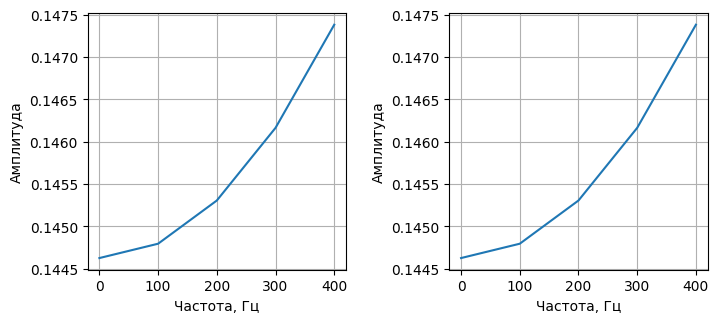

In [161]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

N = 10 # Количество отсчетов
fmax=800 # максимальная частота
T = 1.0/fmax #
f=100 # частота сигнала в Гц
x = np.linspace(0.0, N*T, N)
print(x)
y = np.cos(f * 2.0*np.pi*x) #
print(y)
yf = DFT_slow(origin_signal_cos)
xf = np.linspace(0.0, fmax/2, N//2)
yff = np.fft.fft(origin_signal_cos)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Амплитуда');
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

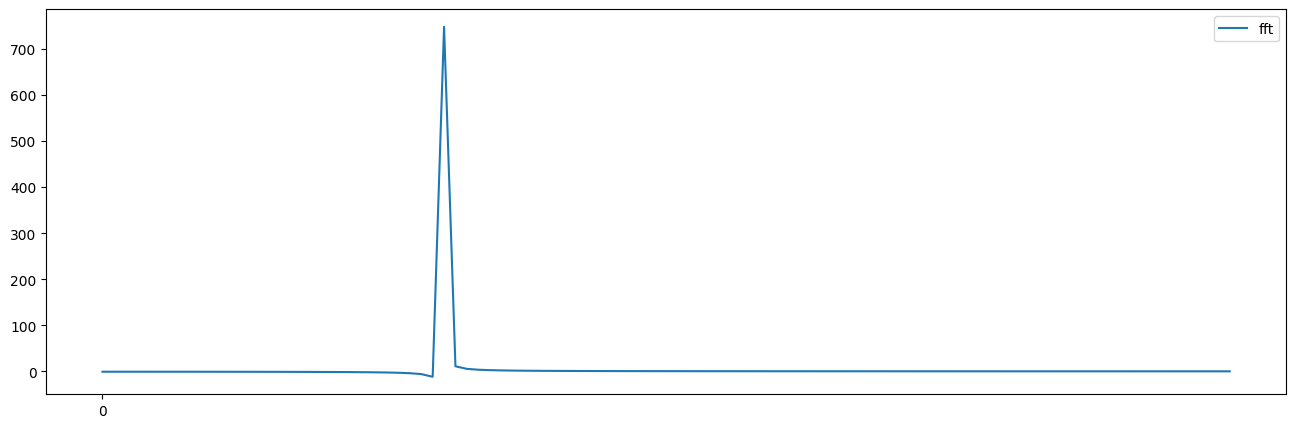

30

In [185]:
fig = plt.figure(figsize=(16, 5))
plt.plot((np.fft.fft(origin_signal_cos)[:100]), label='fft')
plt.xticks(np.arange(0, 1, 1))
plt.legend()
plt.show()

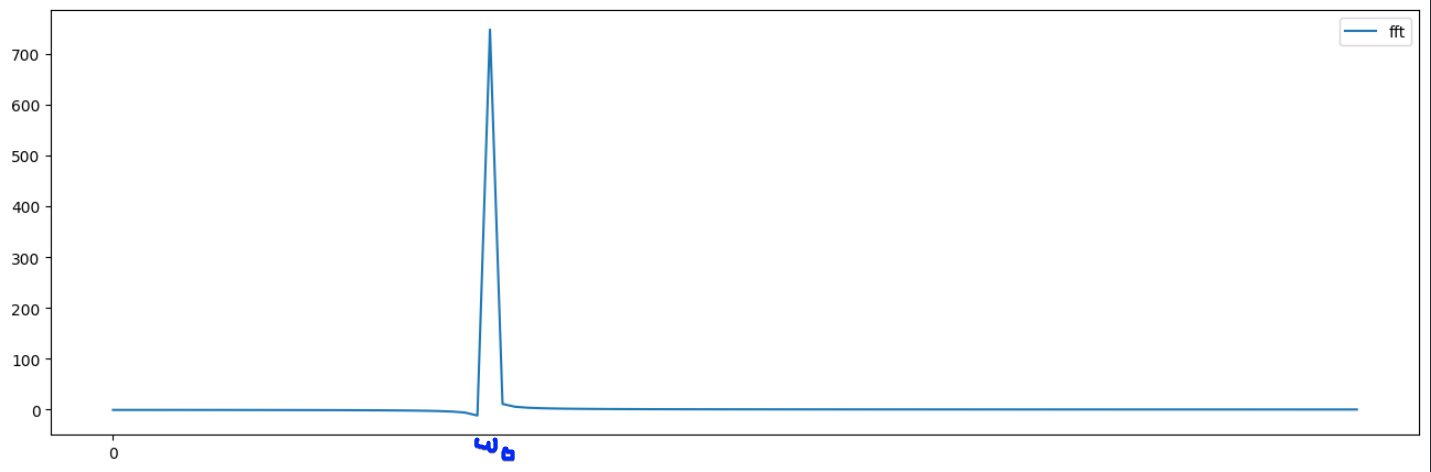

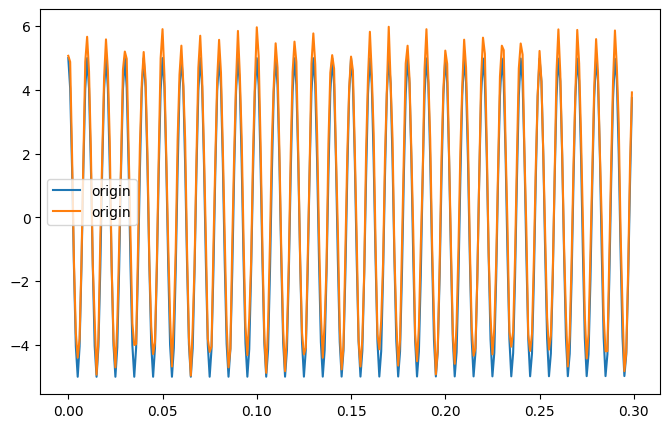

In [187]:
origin_signal_cos_noise = origin_signal_cos + np.random.random(origin_signal_cos.shape)

fig = plt.figure(figsize=(8, 5))
# print(cos_series[1])
plt.plot(cos_series[1], origin_signal_cos, label='origin')
plt.plot(cos_series[1], origin_signal_cos_noise, label='origin')
plt.legend()
plt.show()

d:\Programming\DigitalSignals\venv\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


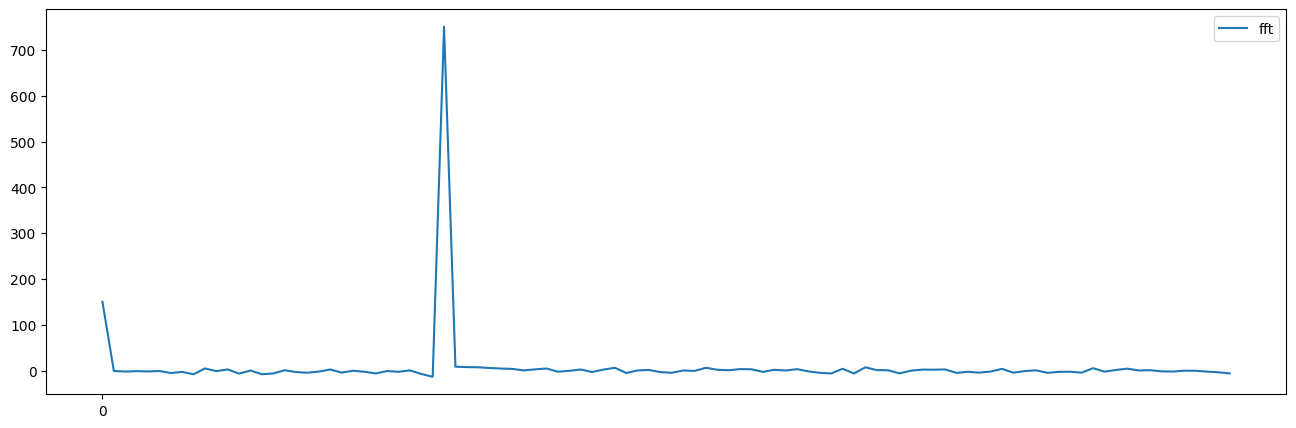

In [188]:
fig = plt.figure(figsize=(16, 5))
plt.plot((np.fft.fft(origin_signal_cos_noise)[:100]), label='fft')
plt.xticks(np.arange(0, 1, 1))
plt.legend()
plt.show()

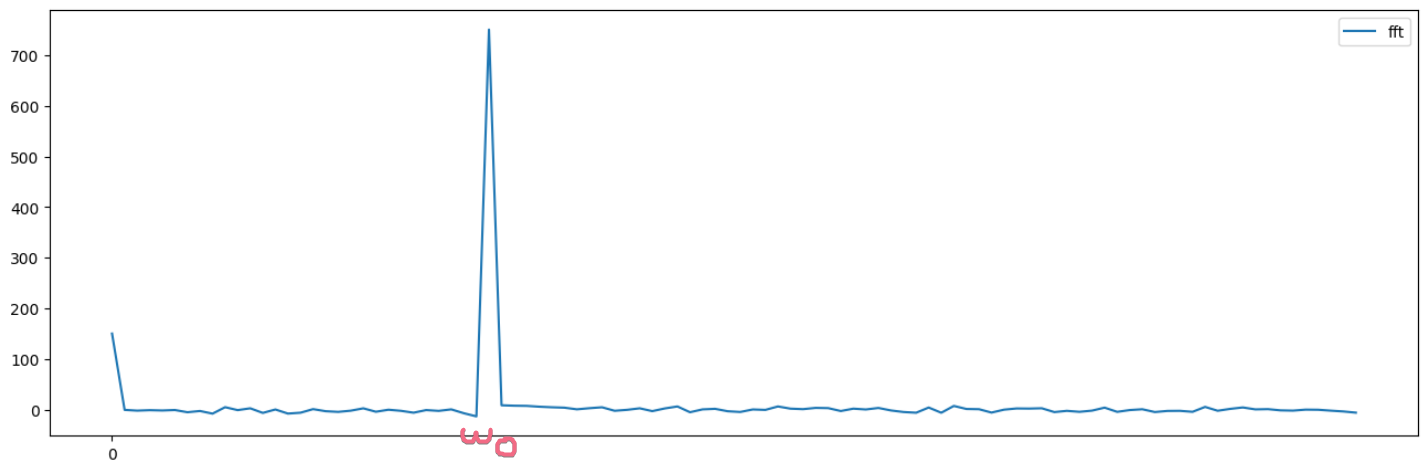